In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Problem 1 

In [7]:
# Problem 1
## Question b)
s = 1
sigma = 0.5
X = np.array([-1.41,-0.57,1.12,3.05])
Y = np.array([1.69,0.51,-1.08,-2.44])
## Posterior parameters estimation.
Sigma = ((1/sigma**2) * np.dot(X,X) + (1/s**2))**(-1)
M_pos = (1/sigma**2) * Sigma * np.dot(X,Y)

xnew = 2.18
### MonteCarlo to estimate mu_new
n = 100000
beta_simul = np.random.normal(loc=M_pos, scale= Sigma**(0.5), size=n)
MC_estimate = np.mean(xnew * beta_simul)
std_simul = np.std(beta_simul * xnew)
### CI
alpha = 0.05
q = scipy.stats.norm.ppf(1-alpha/2)
sup_bound = (q * std_simul) / np.sqrt(n) + MC_estimate
inf_bound = - (q * std_simul) / np.sqrt(n) + MC_estimate
print("MC estimate : {}".format(MC_estimate))
print("{}% CI : [{},{}]".format((1-alpha)*100, inf_bound, sup_bound))

## Question c)
n = 100000
error_simul = np.random.normal(loc=0, scale= 0.5, size= n)
Y_new_simul = error_simul + xnew * np.random.normal(loc=M_pos, scale= Sigma**(0.5), size=n)
count = 0
for i in range(len(Y_new_simul)) :
    if Y_new_simul[i] < -2.1 :
        count += 1
print("Estimated P(Y_new < -2.1) = {}".format(count/n))



MC estimate : -1.882505185231479
95.0% CI : [-1.884369783570375,-1.8806405868925828]
Estimated P(Y_new < -2.1) = 0.35472


# Problem 3 


In [3]:
def solveStationary( A ):
    """ x = xA where x is the answer
    x - xA = 0
    x( I - A ) = 0 and sum(x) = 1
    """
    n = A.shape[0]
    a = np.eye( n ) - A
    a = np.vstack( (a.T, np.ones( n )) )
    b = np.matrix( [0] * n + [ 1 ] ).T
    return np.linalg.lstsq( a, b )[0]


#Problem 3
P = np.array([[0,1/3,1/3,1/3,0],
              [1/3,0,1/3,0,1/3],
              [1/2,1/2,0,0,0],
              [1/2,0,0,0,1/2],
              [0,1/2,0,1/2,0]])
n = np.shape(P)[0]
## Question a)

print("Question a)")
print("Average time spent in A on the long run : {}".format(solveStationary(P)[0]))
print("="*50)
## Question b)
print("Question b)")
print("Number of steps before returning to A : {}".format(1/solveStationary(P)[0]))
print("="*50)
## Question d)
b = [0,-1,0,0,0]
P_mod = P.copy()
P_mod[:,0] = [0] * n
print("Question d)")
print("mu_c = {}".format(np.linalg.solve(P_mod.T - np.eye(n),b)[2]))
print("="*50)

## Question e)
P_mod2 = np.array([[0,0,1/3],
                   [0,0,0.5],
                   [1/2,1/2,0]])
b = [-1/3,-1/2,0]

# np.linalg.solve(P_mod2 - np.eye(n-2),b)
print("Question e)")
print("p_B = {}".format(np.linalg.solve(P_mod2 - np.eye(n-2),b)[0]))
print("="*50)

## Question f)
b = [-1] * n
np.linalg.solve(P_mod-np.eye(n),b)
print("Question f)")
print("Expected number of steps starting from C before returning to A : {}".format(np.linalg.solve(P_mod-np.eye(n),b)[2]))
print("="*50)



Question a)
Average time spent in A on the long run : [[0.25]]
Question b)
Number of steps before returning to A : [[4.]]
Question d)
mu_c = 0.5454545454545454
Question e)
p_B = 0.5714285714285714
Question f)
Expected number of steps starting from C before returning to A : 2.6363636363636362


/Users/thibaudbruyelle/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


# Problem 5

## Question b)

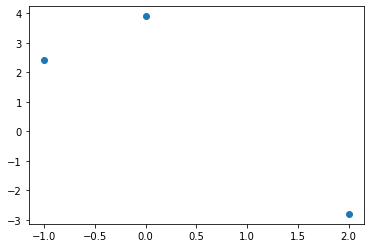

mu_new(1) = 0.6516208944611015
mu_new(1) = 0.27193391171686354
mu_new(1) = 0.11454252616787614


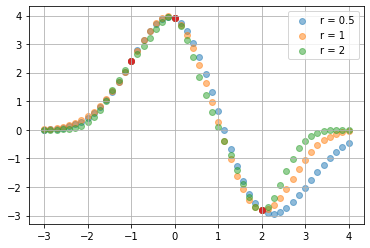

In [4]:
## Problem 5)
def kernel_1(x,y,sigma,r = 0.5) :
    return (sigma**2) * np.exp(-r * (x-y)**2)

### Estimation of sigma.
# def estimate_sigma(Y) :
#     sigma_estimates = [i**2 for i in Y]
#     return np.mean(sigma_estimates)**0.5

## Question b)
X = np.array([-1,0,2])
Y = np.array([2.4,3.9,-2.8])
plt.scatter(X,Y)
plt.show()

# sigma = 1/2
# print(estimate_sigma(Y))

def mu_new(x_new, r=0.5) :
    K33 = np.zeros((3, 3))
    for i in range(3):
        for j in range(3):
            X_i = X[i]
            X_j = X[j]
            K33[i, j] = kernel_1(X_i, X_j, sigma,r)
    K_3new = np.array([kernel_1(x_new,x,sigma,r) for x in X])
    return np.matmul(K_3new, np.matmul(np.linalg.inv(K33), Y))

r_val = [0.5,1,2]
for r in r_val :
    X_new = np.linspace(-3,4,50)
    Y_new_expected_values = np.array([mu_new(x_new,r) for x_new in X_new])
    print("mu_new(1) = {}".format(mu_new(1,r)))
    plt.scatter(X_new, Y_new_expected_values, label = "r = {}".format(r), alpha = 0.5)

plt.scatter(X,Y)
plt.legend()
plt.grid()
plt.show()


## Question c)

We can observe that when r varies, the slope of the function changes around the point 0, -1 and 2. 
In fact, when r increases, it reduces the variance between f(x) and f(y) so this is why we can see on the plot that the expected 
values tend to be higher (for r = 2) (because the expected value is proportional to the inverse of the covariance matrix). 

# Question d)

mu_new_2(1) = -1.1897778071888667
mu_new_2(1) = 2.317844848622231
mu_new_2(1) = 0.6051814078535704


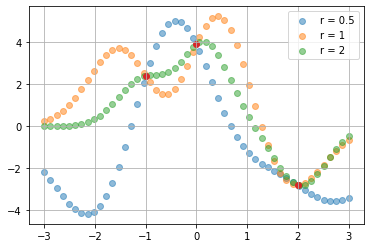

In [6]:
## Question d)
def covariance2(r, x, y):
    return -2 * r * (x - y) * np.exp(-r * (x - y) ** 2)


def covariance3(r, x, y):
    return 2 * r * np.exp(-r * (x - y) ** 2) * (1 - 2 * r * (x - y) ** 2)


Y = np.array([2.4, 3.9, -2.8, 6.4, -2.0, -0.8])


def mu_new_2(xnew, r=0.5):
    K_6new = [kernel_1(i, xnew, sigma, r) for i in X] \
             + [covariance2(r, i, xnew) for i in X]

    K66 = np.zeros((6, 6))
    for i in range(0, 6):
        if i < 3:
            tab = [kernel_1(j, X[i], sigma, r) for j in X] \
                  + [covariance2(r, j, X[i]) for j in X]
        if i >= 3:
            tab = [covariance2(r, X[i - 3], j) for j in X] \
              + [covariance3(r, X[i - 3], j) for j in X]
        K66[i] = tab
    # print(K66)
    return np.matmul(K_6new, np.matmul(np.linalg.inv(K66), Y))

# Plots
r_val = [0.5, 1, 2]
for r in r_val:
    X_new = np.linspace(-3, 3, 50)
    Y_new_expected_values = np.array([mu_new_2(x_new, r) for x_new in X_new])
    print("mu_new_2(1) = {}".format(mu_new_2(1, r)))
    plt.scatter(X_new, Y_new_expected_values, label="r = {}".format(r), alpha=0.5)

plt.scatter(X, Y[0:3], alpha= 1)
plt.legend()
plt.grid()
plt.show()

